In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('paper', font_scale=1.3)
red, blue, green = sns.color_palette('Set1', 3)

import os
# import flag # python -m pip install emoji-country-flag
from datetime import datetime, timedelta

mpl.__version__

def int_to_dt(t):
    return pd.to_datetime(start_date) + timedelta(days=t)

In [55]:
output_folder = '../output/2020-04-28'
table_path = os.path.join(output_folder, 'tables', 'all-countries.csv')
df = pd.read_csv(table_path)
df = df.rename(columns={'official_τ': 'τ official'})
df['country'] = df['country'].str.replace("_", " ")
df.head()

,country,DIC,N,p_steps,p_tau_model,p_Td1,p_Td2,τ official,τ mean,τ median,...,λ mean,λ median,α2 mean,α2 median,E0 mean,E0 median,Iu0 mean,Iu0 median,τ mean.1,τ median.1
0,Sweden,-242.320841,10183175,75000,TauModel.wide_prior,9,6,Mar 18,Mar 13,Mar 12,...,0.62,0.63,0.26,0.20,712.51,437.31,936.68,740.39,17.24,15.70
1,Belgium,-357.457274,11422068,75000,TauModel.wide_prior,9,6,Mar 18,Mar 18,Mar 18,...,0.71,0.78,0.40,0.35,717.39,503.75,820.40,614.50,17.67,17.52
2,United Kingdom,-524.834007,66488991,75000,TauModel.wide_prior,9,6,Mar 24,Mar 24,Mar 27,...,0.53,0.54,0.36,0.29,544.49,354.82,592.50,398.84,27.19,29.16
3,Switzerland,-1010.202692,8516543,75000,TauModel.wide_prior,9,6,Mar 20,Mar 19,Mar 20,...,0.42,0.37,0.28,0.19,482.41,226.66,544.89,293.51,24.24,24.64
4,Wuhan,inf,10607700,75000,TauModel.wide_prior,9,6,Jan 24,Jan 31,Feb 02,...,0.25,0.18,0.51,0.51,1112.45,911.00,998.03,785.73,17.47,18.19


In [56]:
print(df.columns)
print(df.shape)

Index(['country', 'DIC', 'N', 'p_steps', 'p_tau_model', 'p_Td1', 'p_Td2',
       'τ official', 'τ mean', 'τ median', 'Z mean', 'Z median', 'D mean',
       'D median', 'μ mean', 'μ median', 'β mean', 'β median', 'α1 mean',
       'α1 median', 'λ mean', 'λ median', 'α2 mean', 'α2 median', 'E0 mean',
       'E0 median', 'Iu0 mean', 'Iu0 median', 'τ mean.1', 'τ median.1'],
      dtype='object')
(12, 30)


In [57]:
def date_to_int(x):
    dt = datetime.strptime(x + ' 2020', '%b %d %Y')
    td = dt - datetime(2020, 1, 1)
    return td.days
def date_to_date(x):
    dt = datetime.strptime(x + ' 2020', '%b %d %Y')
    return dt

df['τ mean days'] = [date_to_int(x) for x in df['τ mean']]
df['τ median days'] = [date_to_int(x) for x in df['τ median']]
df['τ official days'] = [date_to_int(x) for x in df['τ official']]
df['τ official - mean days'] = df['τ official days'] - df['τ mean days']
df['τ official - median days'] = df['τ official days'] - df['τ median days']
df['τ mean'] = [date_to_date(x) for x in df['τ mean']]
df['τ median'] = [date_to_date(x) for x in df['τ median']]
df['τ official'] = [date_to_date(x) for x in df['τ official']]

df.head()

,country,DIC,N,p_steps,p_tau_model,p_Td1,p_Td2,τ official,τ mean,τ median,...,E0 median,Iu0 mean,Iu0 median,τ mean.1,τ median.1,τ mean days,τ median days,τ official days,τ official - mean days,τ official - median days
0,Sweden,-242.320841,10183175,75000,TauModel.wide_prior,9,6,2020-03-18,2020-03-13,2020-03-12,...,437.31,936.68,740.39,17.24,15.70,72,71,77,5,6
1,Belgium,-357.457274,11422068,75000,TauModel.wide_prior,9,6,2020-03-18,2020-03-18,2020-03-18,...,503.75,820.40,614.50,17.67,17.52,77,77,77,0,0
2,United Kingdom,-524.834007,66488991,75000,TauModel.wide_prior,9,6,2020-03-24,2020-03-24,2020-03-27,...,354.82,592.50,398.84,27.19,29.16,83,86,83,0,-3
3,Switzerland,-1010.202692,8516543,75000,TauModel.wide_prior,9,6,2020-03-20,2020-03-19,2020-03-20,...,226.66,544.89,293.51,24.24,24.64,78,79,79,1,0
4,Wuhan,inf,10607700,75000,TauModel.wide_prior,9,6,2020-01-24,2020-01-31,2020-02-02,...,911.00,998.03,785.73,17.47,18.19,30,32,23,-7,-9


## Compare $\tau$ posterior mean and posterior median

,τ mean days,τ median days
τ mean days,1.000000,0.993338
τ median days,0.993338,1.000000


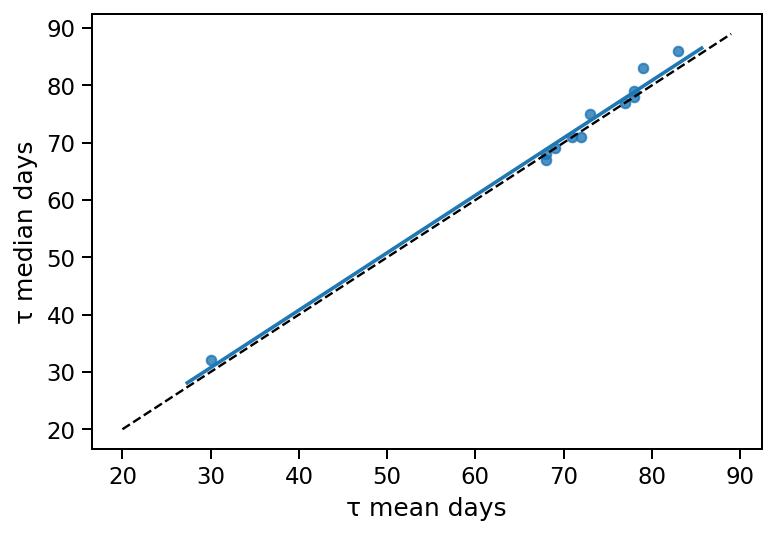

In [58]:
# df.plot.scatter('τ mean days', 'τ median days')
sns.regplot('τ mean days', 'τ median days', data=df, ci=False)
plt.plot(np.arange(20, 90), np.arange(20, 90), ls='--', color='k')

df[['τ mean days', 'τ median days']].corr()

# Compare $\tau^*$ and $\hat{\tau}$

,τ mean days,τ median days,τ official days
τ mean days,1.000000,0.993338,0.967873
τ median days,0.993338,1.000000,0.944228
τ official days,0.967873,0.944228,1.000000


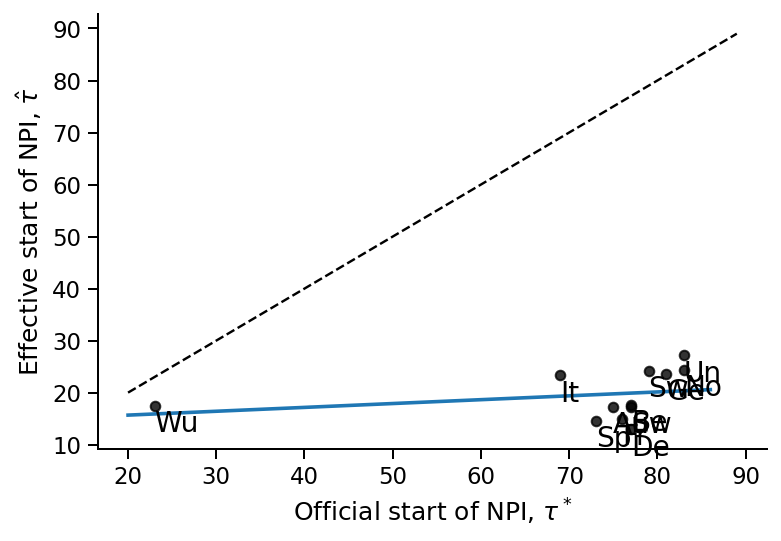

In [68]:
fig, ax = plt.subplots()

sns.regplot('τ official days', 'τ mean days', ci=False, data=df, ax=ax, 
            scatter_kws=dict(color='k'), line_kws=dict())
ax.plot(np.arange(20, 90), np.arange(20, 90), ls='--', color='k')
for _, row in df.iterrows():
    x0, y0 = (row['τ official days'], row['τ mean days'])
    if y0 < x0: y0 -= 5
    else: y0 += 5
    ax.text(x0, y0, row['country'][:2], fontsize=14)
ax.set(
    xlabel=r'Official start of NPI, $\tau^*$',
    ylabel=r'Effective start of NPI, $\hat{\tau}$',
)
sns.despine()


df[['τ mean days', 'τ median days', 'τ official days']].corr()

In [60]:
date_range = [datetime(2020, 1, 1) + timedelta(weeks=2*i) for i in range(8)]
date_formatter = mpl.dates.DateFormatter('%b %d')

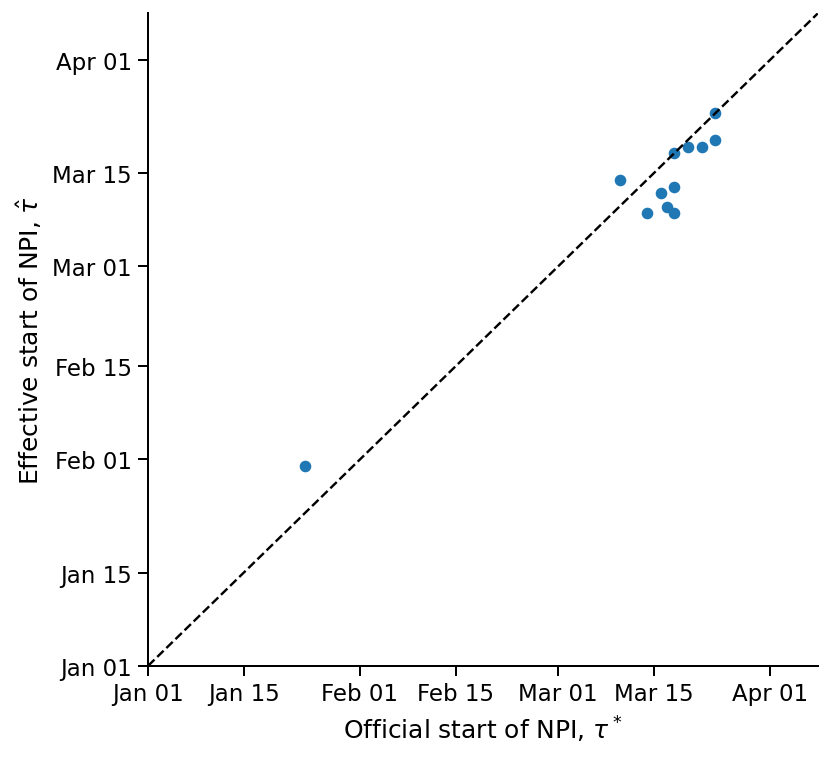

In [61]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot('τ official', 'τ mean', 'o', data=df)
plt.plot(date_range, date_range, '--k')
ax.set(
    xlabel=r'Official start of NPI, $\tau^*$',
    ylabel=r'Effective start of NPI, $\hat{\tau}$',
    xlim=(min(date_range), max(date_range)),
    ylim=(min(date_range), max(date_range)),
#     xticks=date_range[::2],
#     yticks=date_range[::2],
)
ax.xaxis.set_major_formatter(date_formatter)
ax.yaxis.set_major_formatter(date_formatter)
sns.despine()

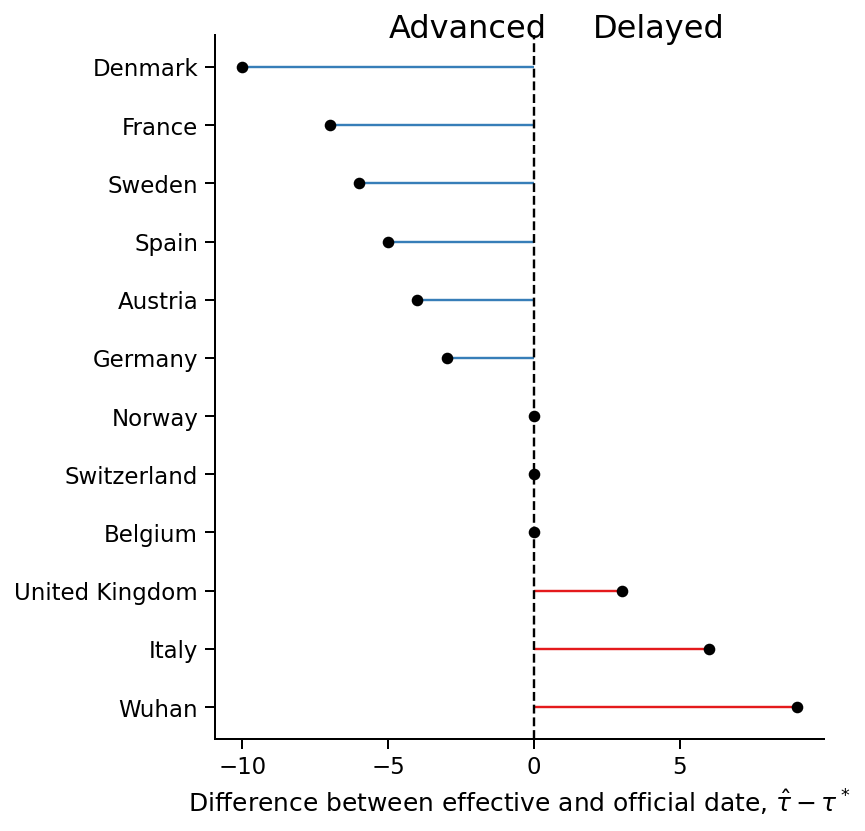

In [66]:
col = 'τ official - median days'

fig, ax = plt.subplots(figsize=(6, 6))
df_ = df.sort_values(col)
idx = df_[col] > 0
ax.plot(-df_[col], df_['country'], 'ok')
ax.hlines(df_.loc[idx, 'country'], -df_.loc[idx, col], 0, color=blue)
ax.hlines(df_.loc[~idx, 'country'], -df_.loc[~idx, col], 0, color=red)
plt.axvline(0, ls='--', color='k')
ax.set(
    xlabel=r'Difference between effective and official date, $\hat{\tau} - \tau^*$',
)
ax.annotate('Delayed', (2, 11.5), fontsize=16)
ax.annotate('Advanced', (-5, 11.5), fontsize=16)
sns.despine()
plt.tight_layout()
# fig.savefig('../figures/Fig1.pdf', dpi=100)